# Task 3. Algorithms for unconstrained nonlinear optimization. First- and second-order methods
## Alexandra Matveeva J4134c


In [ ]:
# Gradient Descent
# Non-linear Conjugate Gradient Descent
# Newton's method
# Levenberg-Marquardt algorithm

In [1]:
import random
import numpy as np
from scipy import optimize
from autograd import jacobian
import matplotlib.pyplot as plt
from functools import partial
from sympy import *

In [2]:
eps = 1e-3

In [3]:
alpha, beta = random.random(), random.random()
print(alpha, beta)

0.5476257840269831 0.582706205789297


In [4]:
# noisy data generation
x = []
yk = []
y_init = []
for k in range(101):
    x.append(k / 100)
    y_init.append(alpha * x[k] + beta)
    yk.append(y_init[k] + np.random.normal(0, 1))
x = np.array(x)
yk = np.array(yk)
y_init = np.array(y_init)

In [5]:

# linear approximation function

def linear_approx_func(x, a, b):
    y = []
    for i in range(101):
        y.append(a * x[i] + b)
    return np.array(y)

In [6]:
# rational approximation function

def rational_approx_func(x, a, b):
    y = []
    for i in range(101):
        y.append(a / (1 + b * x[i]))
    return np.array(y)

In [7]:
def least_squares_linear(params, y_f, x):
    a, b = params
    return np.sum((linear_approx_func(x, a, b) - y_f) ** 2)

In [8]:
def least_squares_rational(params, y_f, x):
    a, b = params
    return np.sum((rational_approx_func(x, a, b) - y_f) ** 2)

In [9]:
 # partial der a

def partial_der_a(x, y, a, b, func_type):
  sum = 0
  if (func_type == 'linear'):
    for k in range(101):
      sum += 2 * x[k] * (a * x[k] + b - y[k])
  else:
    for k in range(101):
      sum += 2 * (a / (1 + b * x[k]) - y[k]) * 1 / (1 + b * x[k])
  return sum

In [10]:
# partial der b

def partial_der_b(x, y, a, b, func_type):
  sum = 0 
  if (func_type == 'linear'):
    for k in range(101):
      sum += 2 * (a * x[k] + b - y[k])
  else:
    for k in range(101):
      sum += 2 * (a / (1 + b * x[k]) - y[k]) * (- a * x[k]) / (1 + b * x[k]) ** 2
  return sum


In [11]:
def gradient_descent(x, y, func_type):
    a, b = 0.5, 0.5
    beta = 1e-2
    iter = 0
    f_calls = 0
    iter_max = 1000
    while True:
        prev_a, prev_b = a, b
        if func_type == 'linear':
            a = a - beta * 2 * sum(x * (a * x + b - y))
            b = b - beta * 2 * sum(a * x + b - y)
        elif func_type == 'rational':
            a = a - beta * 2 * sum((a / (1 + b * x) - y) * 1 / (1 + b * x))
            b = b - beta * (-2) * sum(a * x * (a - y * (b * x + 1)) / (b * x + 1) ** 3)
        iter += 1
        f_calls += 1
        if (((a - prev_a) ** 2 + (b - prev_b) ** 2) ** 0.5 < eps) or (iter >= iter_max):
            break

    return a, b, iter, f_calls

For linear

In [12]:
# Linear Gradient Descent
linear_params_grad = gradient_descent(x, yk, 'linear')
linear_params_grad

(0.23053595537425506, 0.6798908538721501, 18, 18)

In [13]:
# Non-linear Conjugate Gradient Descent
linear_params_conj_grad = optimize.minimize(least_squares_linear, [0, 0], args=(yk, x), method='CG', tol=eps)
print(linear_params_conj_grad)

     fun: 98.16925310507877
     jac: array([-2.86102295e-06,  0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 2
    njev: 5
  status: 0
 success: True
       x: array([0.22829801, 0.6808547 ])


In [14]:
# Newton's methods

linear_params_newton = optimize.minimize(least_squares_linear, [0, 0], args=(yk, x), method='Newton-CG', jac=jacobian(least_squares_linear), tol=eps)
print(linear_params_newton)



     fun: 98.16925327017293
     jac: array([-0.1153287 , -0.21992123])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 0
     nit: 3
    njev: 12
  status: 0
 success: True
       x: array([0.22843569, 0.680781  ])


In [15]:
# Levenberg-Marquardt algorithm
def linear_reseduals(params, yk, x): 
  a, b = params
  res = np.zeros(len(x))
  for i in range(len(x)):
    res[i] = (a * x[i] + b) - yk[i]
  return res

linear_params_lm = optimize.least_squares(linear_reseduals, [0, 0], args=(yk, x), method='lm', xtol=eps)
print(linear_params_lm)


 active_mask: array([0, 0])
        cost: 49.08462655253937
         fun: array([-0.77188589,  0.25867183,  0.31824843, -1.49834518, -0.18486349,
        0.36071082,  0.46422908,  1.33861187, -2.11659659, -0.58344778,
       -1.80442301, -0.08096736, -1.37347612, -0.58717729,  0.46772719,
        1.92169297,  0.81707515,  0.61778951,  0.13892642, -1.11326136,
        2.20520583, -0.62375201,  0.90606379,  0.03479547, -2.02480409,
       -0.3014093 ,  0.43635675,  0.37284498, -1.40902584,  0.1688974 ,
        1.1912472 ,  2.0123349 ,  1.17101784,  0.54871292, -0.54210464,
       -0.05092389,  1.51168133, -0.91826947,  1.93503507,  0.42043838,
       -0.87315944, -1.99879539, -0.38852332,  0.30262789,  0.81983599,
       -0.30381843,  0.39053623,  1.06321089, -1.09756383,  1.45472967,
        0.27006631,  0.5021517 , -0.0222287 , -1.11906815,  0.15146914,
       -1.36006258, -0.52268106,  0.47725979, -0.45032581,  0.68457687,
        1.33023223, -0.86787173,  0.03972609, -0.13963233, -0.

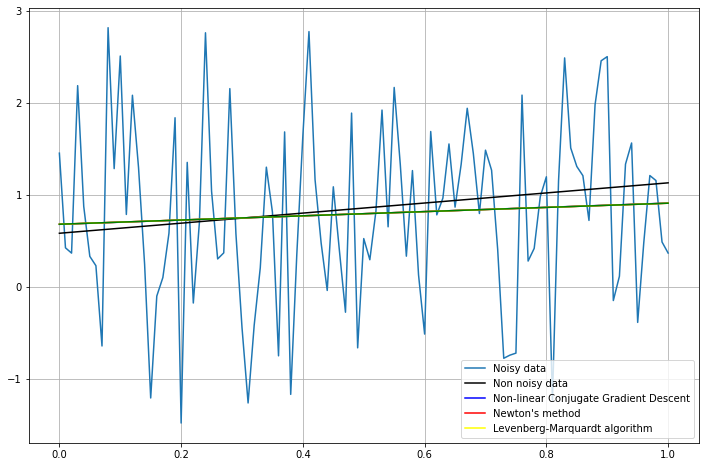

In [16]:
y_linear_opt_grad = []
for i in range(101):
    y_linear_opt_grad.append(linear_params_grad[0] * x[i] + linear_params_grad[1])

y_linear_opt_conj_grad = []
for i in range(101):
    y_linear_opt_conj_grad.append(linear_params_conj_grad.x[0] * x[i] + linear_params_conj_grad.x[1])

y_linear_opt_newton = []
for i in range(101):
    y_linear_opt_newton.append(linear_params_newton.x[0] * x[i] + linear_params_newton.x[1])
    
y_linear_opt_lm = []
for i in range(101):
    y_linear_opt_lm.append(linear_params_lm.x[0] * x[i] + linear_params_lm.x[1])

plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, yk)
plt.plot(x, y_init, color='black')
plt.plot(x, y_linear_opt_grad, color='blue')
plt.plot(x, y_linear_opt_conj_grad, color='red')
plt.plot(x, y_linear_opt_newton, color='yellow')
plt.plot(x, y_linear_opt_lm, color='green')
plt.legend(['Noisy data', 'Non noisy data', 'Non-linear Conjugate Gradient Descent', "Newton's method", 'Levenberg-Marquardt algorithm'])
plt.show()

For rational

In [17]:
# Linear Gradient Descent
rational_params_grad = gradient_descent(x, yk, 'rational')
rational_params_grad

(0.6778024972298367, -0.2788021944763556, 31, 31)

In [18]:
# Non-linear Conjugate Gradient Descent
rational_params_conj_grad = optimize.minimize(least_squares_rational, [0, 0], args=(yk, x), method='CG', tol=eps)
print(rational_params_conj_grad)

     fun: 98.09470781343568
     jac: array([-0.00010204,  0.000103  ])
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 10
    njev: 23
  status: 0
 success: True
       x: array([ 0.67711931, -0.28006666])


In [19]:
# Newton's methods

rational_params_newton = optimize.minimize(least_squares_rational, [0, 0], args=(yk, x), method='Newton-CG', jac=jacobian(least_squares_rational), tol=eps)
print(rational_params_newton)

     fun: 98.09470781334336
     jac: array([ 0.00303095, -0.00335874])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 5
    njev: 29
  status: 0
 success: True
       x: array([ 0.67711838, -0.28006944])


In [20]:
# Levenberg-Marquardt algorithm
def rational_reseduals(params, yk, x): 
  a, b = params
  res = np.zeros(len(x))
  for i in range(len(x)):
    res[i] = (a / (1 + b * x[i])) - yk[i]
  return res

rational_params_lm = optimize.least_squares(rational_reseduals, [0, 0], args=(yk, x), method='lm', xtol=eps)
print(rational_params_lm)

 active_mask: array([0, 0])
        cost: 49.04735390681204
         fun: array([-0.77562474,  0.25455176,  0.31375784, -1.50319547, -0.19006259,
        0.35517389,  0.45836542,  1.33243264, -2.12308011, -0.59022423,
       -1.8114809 , -0.08829514, -1.38106212, -0.59500973,  0.45966017,
        1.91340336,  0.80857503,  0.60909106,  0.13004194, -1.12231945,
        2.19598664, -0.63311968,  0.89656039,  0.02516918, -2.03454028,
       -0.31124231,  0.42644014,  0.36285809, -1.41906957,  0.15881041,
        1.18113065,  2.0022026 ,  1.16088376,  0.53859112, -0.55219994,
       -0.06097835,  1.50168219, -0.92819868,  1.92519054,  0.41069341,
       -0.8827898 , -2.00829599, -0.39787883,  0.29343293,  0.81081719,
       -0.31264531,  0.38191719,  1.05481575, -1.10571885,  1.44683116,
        0.26244085,  0.49481599, -0.02925779, -1.12577358,  0.14510456,
       -1.36606893, -0.52831162,  0.47202272, -0.45515148,  0.68018069,
        1.32628379, -0.87135398,  0.03672866, -0.14212611, -0.

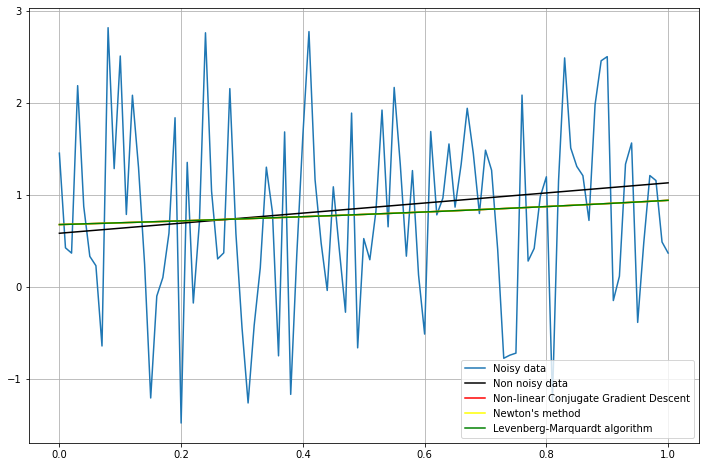

In [21]:
y_rational_opt_conj_grad = []
for i in range(101):
    y_rational_opt_conj_grad.append(rational_params_conj_grad.x[0] / (1 + rational_params_conj_grad.x[1] * x[i]))

y_rational_opt_newton = []
for i in range(101):
    y_rational_opt_newton.append(rational_params_conj_grad.x[0] / (1 + rational_params_conj_grad.x[1] * x[i]))
    
y_rational_opt_lm = []
for i in range(101):
    y_rational_opt_lm.append(rational_params_conj_grad.x[0] / (1 + rational_params_conj_grad.x[1] * x[i]))

plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, yk)
plt.plot(x, y_init, color='black')
plt.plot(x, y_rational_opt_conj_grad, color='red')
plt.plot(x, y_rational_opt_newton, color='yellow')
plt.plot(x, y_rational_opt_lm, color='green')
plt.legend(['Noisy data', 'Non noisy data', 'Non-linear Conjugate Gradient Descent', "Newton's method", 'Levenberg-Marquardt algorithm'])
plt.show()